In [8]:
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
from IPython.display import Image
import numpy as np


In [2]:
ggplot2 = importr('ggplot2')

In [3]:
df = pd.DataFrame({
    'x': np.arange(1,10), 
    'y': np.arange(11,20)
})

In [4]:
df2 = pd.DataFrame({
    'x': np.arange(101,110), 
    'y': np.arange(111,120)
})

In [9]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    rdf = robjects.conversion.py2rpy(df2)

In [10]:
robjects.globalenv['df'] = rdf

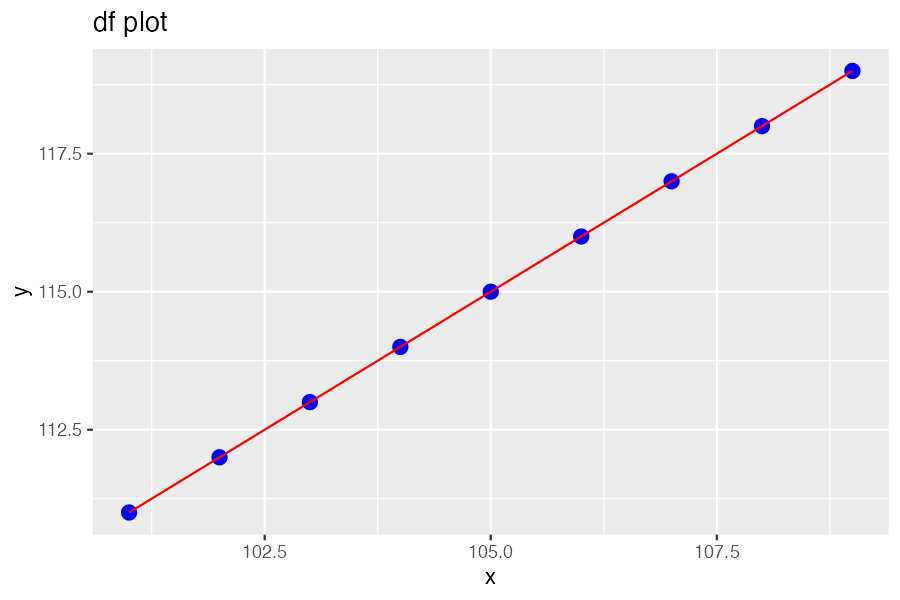

In [11]:
robjects.r('''
library(ggplot2)

p <- ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "blue", size = 3) +
  geom_line(color = "red") +
  ggtitle("df plot")

ggsave("myplot.png", plot = p, width=6, height=4, dpi=150)
''')

Image(filename='myplot.png')